# Analisis del Programa de Resultados Electorales Preliminares Querétaro 2018
## Contenido
- [Preparativos](#Preparativos)
  - [Bibliotecas](#Bibliotecas)
  - [Preprocesamiento](#Preprocesamiento)
- [Analisis](#Analisis)
  - [Comparacion CLAVE_CASILLA Y CLAVE_ACTA](#Comparacion-CLAVE_CASILLA-y-CLAVE_ACTA)
  - [Composicion CLAVE_CASILLA](#Composicion-CLAVE_CASILLA)
  - [Comparacion TOTAL_VOTOS_ASENTADO y TOTAL_VOTOS_CALCULADO](#Comparacion-TOTAL_VOTOS_ASENTADO-y-TOTAL_VOTOS_CALCULADO)
  - [Partidos en Coalicion o Individual](#)
  Del total de votos por partido (sumando individuales y coalicion), sacar las proporciones de individual y por coalicion para saber si hay algun partido que tenga mas votos en individual que en coalicion o viceversa.
  - [Votos Urbano vs No Urbano](#)
  Ver si hay algun partido 
  - [Por DISTRITO_LOCAL](#)
  Determinar que partidos (de forma individual) tiene mas seguidores en cada distrito local.
  - [GANADORES](#)
  - [Omisiones de Votos](#)
  Determinar en cada casilla las omisiones de boletas sobrantes y la proporcion con los votos realizados
  - [](#)


- [Notas](#Notas)


## Preparativos

### Bibliotecas

In [3]:
# Asignar directorios de trabajo a "./someweird"
import os
import matplotlib as plt
# os.chdir("./someweird")

DATA_DIR = "./data/20180702_1145_PREP/"
FILE_DATA_PATH = DATA_DIR + "QRO_DIP_LOC_2018.csv"

#
# Cargar archivos de .data/20180702_1145_PREP/QRO_DIP_LOC_2018.csv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

# table start in A6

data = pd.read_csv(FILE_DATA_PATH, header=4, dtype=str)
data

,CLAVE_CASILLA,CLAVE_ACTA,ID_ESTADO,ESTADO,ID_DISTRITO_LOCAL,DISTRITO_LOCAL,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,...,OBSERVACIONES,CONTABILIZADA,MECANISMOS_TRASLADO,SHA,FECHA_HORA_ACOPIO,FECHA_HORA_CAPTURA,FECHA_HORA_VERIFICACION,ORIGEN,DIGITALIZACION,TIPO_DOCUMENTO
0,220277B0100,220277B0100,22,QUERETARO,1,QUERETARO 01,0277,961,B,00,...,NaN,1,D,77B4E74C39AA83026388F7148239AF76816E8B6D29CC03...,02/07/2018 01:18:43,02/07/2018 02:18:53,02/07/2018 04:25:39,CATD,ESCANER,ACTA PREP
1,220277C0100,220277C0100,22,QUERETARO,1,QUERETARO 01,0277,962,C,00,...,NaN,1,D,C055A6A27C574F57BE0185476BC19756D0290CB26C9FB6...,02/07/2018 01:17:20,02/07/2018 04:40:41,02/07/2018 05:41:19,CATD,ESCANER,ACTA PREP
2,220277C0200,220277C0200,22,QUERETARO,1,QUERETARO 01,0277,963,C,00,...,NaN,1,D,83A57141BC2CB59F7A4D43069AF9DBBA5B13B61320FC59...,02/07/2018 00:42:16,02/07/2018 01:03:58,02/07/2018 01:15:12,CATD,ESCANER,ACTA PREP
3,220277C0300,220277C0300,22,QUERETARO,1,QUERETARO 01,0277,964,C,00,...,NaN,1,D,AB96359CA2A806F9B8A96D9666FC3D74571BA564F32DA1...,02/07/2018 01:18:11,02/07/2018 02:40:52,02/07/2018 05:05:53,CATD,ESCANER,ACTA PREP
4,220277C0400,220277C0400,22,QUERETARO,1,QUERETARO 01,0277,965,C,00,...,NaN,1,D,4D527753D1E7D940AEA1CE9FF61E66A3237D5255359759...,02/07/2018 00:42:51,02/07/2018 01:09:11,02/07/2018 01:37:26,CATD,ESCANER,ACTA PREP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,'220560E0100,'220560E0100,22,QUERETARO,15,JALPAN DE SERRA,0560,1866,E,00,...,NaN,1,D,3D4784EAF0E8D2B440B5C1E69CBABAB6529198038D9AEF...,02/07/2018 04:01:00,02/07/2018 04:09:51,02/07/2018 04:13:08,CATD,ESCANER,ACTA PREP
2644,'220560E0200,'220560E0200,22,QUERETARO,15,JALPAN DE SERRA,0560,1867,E,00,...,NaN,1,D,132AB7B5B93DB99D91A4730A20E60B93D08C5A867296E0...,02/07/2018 01:24:12,02/07/2018 01:41:11,02/07/2018 01:50:03,CATD,ESCANER,ACTA PREP
2645,220561B0100,220561B0100,22,QUERETARO,15,JALPAN DE SERRA,0561,1868,B,00,...,NaN,1,D,C6FFB9FC04C0ED64E2932E4880A85007BD4BD02B3E7C6C...,02/07/2018 00:52:07,02/07/2018 01:03:10,02/07/2018 01:08:31,CATD,ESCANER,ACTA PREP
2646,'220561E0100,'220561E0100,22,QUERETARO,15,JALPAN DE SERRA,0561,1869,E,00,...,NaN,1,D,5DA938A7C3E4466246F732E7FCC1BA4D9F084FF3D1764C...,02/07/2018 00:50:46,02/07/2018 01:04:55,02/07/2018 01:06:02,CATD,ESCANER,ACTA PREP


In [367]:
def resume_column(columna, title=None):
	columna_frecuencia = columna.value_counts(dropna=False).sort_values(ascending=False)
	columna_proporciones = columna_frecuencia/columna_frecuencia.sum()*100
	print(f'Cantidad de registros por {columna.name}: \n[{len(columna)}] 100%\n{(columna_proporciones).apply(lambda x: f"{x:.2f}%")}')
	
	colores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'brown', 'gray', 'olive', 'navy']

	theme = plt.get_cmap('jet')
	colores = [theme(1. * i / len(columna.unique())) for i in range(len(columna.unique()))]

	plt.subplot(1, 2, 1)
	plt.pie(columna_proporciones.values, labels=(columna_proporciones).apply(lambda x: f"{x:.2f}%"), colors = colores[:len(columna.unique())])
	plt.title(columna.name)
	plt.legend(labels=columna_proporciones.index, loc='lower left', bbox_to_anchor=(0, -0.2))
	plt.subplot(1, 2, 2)
	plt.bar(range(len(columna.unique())), columna_frecuencia.values, tick_label=columna_proporciones.index, label=columna_proporciones.index, color = colores[:len(columna.unique())])
	plt.title(columna.name)
	plt.tight_layout()
	plt.show()   


### Preprocesamiento
Se realiza el lleno de datos faltantes llenando con ceros los valores faltantes 

In [368]:
MISSING_DATA_WAYS = ['', '-','Sin dato', 'Ilegible']
MISSWRITE_DATA_WAYS = ['Sin dato', 'Ilegible']
# Realizar regresion para el llenado de datos faltantes de cada columna
MISSWRITE_COLUMNS = np.array([])
for columna in data.columns:

	# Cuando hay datos faltantes (distinto a datos mal escritos u omitidos). Se llenaran con 0
	if data[columna].isin(MISSING_DATA_WAYS).any():
		# Cambiar los valores faltantes por NaN
		data[columna] = data[columna].replace(MISSING_DATA_WAYS, np.nan)


		# Comprobar que los datos sean numericos
		if data[columna].dropna().astype(str).str.isnumeric().all():
			data[columna] = data[columna].fillna(0).astype(int)
		else:	# NUNCA SUCEDE
			print(f'Columna {columna} con datos no numericos'.upper())
	# Cuando hay datos mal escritos u omitidos. Se llenaran con regresion lineal
	if data[columna].isin(MISSWRITE_DATA_WAYS).any():
		# print(f'Columna {columna} con datos mal escritos u omitidos')
		MISSWRITE_COLUMNS = np.append(MISSWRITE_COLUMNS, columna)

print(f'Columnas con datos mal escritos u omitidos [{len(MISSWRITE_COLUMNS)}]:\n{MISSWRITE_COLUMNS}')

# Guardar datos en un archivo de salida
data.to_csv(DATA_DIR + "QRO_DIP_LOC_2018_clean.csv", index=False)

Columnas con datos mal escritos u omitidos [0]:
[]


## Analisis

### Comparacion-CLAVE_CASILLA-y-CLAVE_ACTA

In [369]:
# Obtener todos los registros que no sean iguales CLAVE_CASILLA y CLAVE_ACTA
anomalias = data[data.CLAVE_CASILLA != data.CLAVE_ACTA]
if (len(anomalias)): 
	print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != CLAVE_ACTA")
	print(anomalias)
else:
    print("No se encontraron registros con CLAVE_CASILLA != CLAVE_ACTA")
print(data[['CLAVE_CASILLA', 'CLAVE_ACTA']].head(10))

No se encontraron registros con CLAVE_CASILLA != CLAVE_ACTA
  CLAVE_CASILLA   CLAVE_ACTA
0   220277B0100  220277B0100
1   220277C0100  220277C0100
2   220277C0200  220277C0200
3   220277C0300  220277C0300
4   220277C0400  220277C0400
5   220277C0500  220277C0500
6   220277C0600  220277C0600
7   220277C0700  220277C0700
8   220277C0800  220277C0800
9   220278B0100  220278B0100


### Composicion-CLAVE_CASILLA

In [370]:
print("Total de registros: ", len(data))
### Comprobacion que la CLAVE_CASILLA este conformada por ID_ESTADO, SECCION, TIPO_CASILLA
anomalias = data[data.CLAVE_CASILLA.str[:7] != data.ID_ESTADO + data.SECCION + data.TIPO_CASILLA]
if (len(anomalias)):
	print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
	anomalias = anomalias[anomalias.CLAVE_CASILLA.str[1:8] != anomalias.ID_ESTADO + anomalias.SECCION + anomalias.TIPO_CASILLA]
	if (len(anomalias)):
		print("Se encontraron " + str(len(anomalias)) + " registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
		print(anomalias[['CLAVE_CASILLA', 'ID_ESTADO', 'SECCION', 'TIPO_CASILLA']])
	else:
		print("Las casillas encontradas anteriormente tienen un caracter anormal al inicio de la CLAVE_CASILLA")

else:
	print("No se encontraron registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA")
print(pd.DataFrame({"CLAVE_CASILLA": data.CLAVE_CASILLA, "ID_ESTADO": data.ID_ESTADO, "SECCION":data.SECCION, "TIPO_CASILLA":data.TIPO_CASILLA}))

Total de registros:  2648
Se encontraron 181 registros con CLAVE_CASILLA != ID_ESTADO+SECCION+TIPO_CASILLA
Las casillas encontradas anteriormente tienen un caracter anormal al inicio de la CLAVE_CASILLA
     CLAVE_CASILLA ID_ESTADO SECCION TIPO_CASILLA
0      220277B0100        22    0277            B
1      220277C0100        22    0277            C
2      220277C0200        22    0277            C
3      220277C0300        22    0277            C
4      220277C0400        22    0277            C
...            ...       ...     ...          ...
2643  '220560E0100        22    0560            E
2644  '220560E0200        22    0560            E
2645   220561B0100        22    0561            B
2646  '220561E0100        22    0561            E
2647   220562B0100        22    0562            B

[2648 rows x 4 columns]


### Comparacion-TOTAL_VOTOS_ASENTADO-y-TOTAL_VOTOS_CALCULADO

In [371]:
#Comprobación de TOTAL_VOTOS ASENTADO = TOTAL_VOTOS_CALCULADO
anomalias = data[data.TOTAL_VOTOS_ASENTADO != data.TOTAL_VOTOS_CALCULADO][["TOTAL_VOTOS_ASENTADO", "TOTAL_VOTOS_CALCULADO"]]
if(len(anomalias)):
    print("Se encontraron " + str(len(anomalias)) + " registros con anomalias")
    print(anomalias)

Se encontraron 2648 registros con anomalias
      TOTAL_VOTOS_ASENTADO TOTAL_VOTOS_CALCULADO
0                      435                   435
1                      444                   444
2                      429                   429
3                      408                   408
4                      389                   389
...                    ...                   ...
2643                   258                   258
2644                   115                   115
2645                    84                    84
2646                    93                    93
2647                   204                   204

[2648 rows x 2 columns]


### Columnas Casillas y Filas votos por partido

In [372]:
columnas_partidos = ["PAN","PRI","PRD","MC","PANAL","PVEM","PES","M","PT","CQ","QI","MORENA_PT_PES","MORENA_PT","MORENA_PES","PT_PES","PRI_PVEM","PAN_PRD_MC","PAN_PRD","PAN_MC","PRD_MC","CAND_IND_1","CAND_IND_2","CAND_IND_3","CAND_IND_4","CAND_IND_5","CAND_IND_6","CAND_IND_7","CAND_IND_8","CAND_IND_9","CAND_IND_10","CAND_IND_11","CAND_IND_12","CAND_IND_13","CAND_IND_14","CAND_IND_15","CAND_IND_16","CAND_IND_17","CAND_IND_18","CAND_IND_19","CAND_IND_20","CAND_IND_21","CAND_IND_22","CAND_IND_23","CAND_IND_24","CAND_IND_25","CAND_IND_26","CAND_IND_27","CAND_IND_28","CAND_IND_29","CAND_IND_30","CAND_IND_31"]
clave = "QUERETARO 01"
partidos = data[data['DISTRITO_LOCAL']=="QUERETARO 01"][columnas_partidos].astype(int).sum(axis=0)
# Sumar las filas y hacerlas una


Cantidad de registros por QUERETARO 01: 
[62895] 100%
M                30.71%
PAN              30.13%
PRI              17.27%
QI                7.37%
PVEM              3.21%
PES               2.17%
PT                1.70%
MC                1.58%
PRD               1.47%
PANAL             1.07%
MORENA_PT_PES     1.01%
CQ                0.96%
PAN_PRD           0.68%
MORENA_PT         0.36%
MORENA_PES        0.22%
PT_PES            0.09%
Name: QUERETARO 01, dtype: object


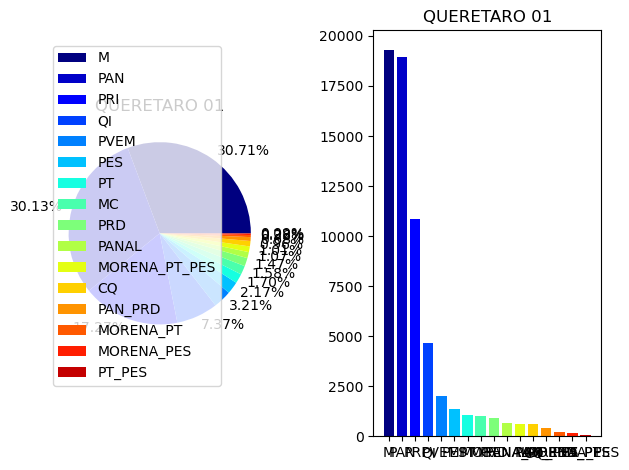

In [373]:
# Hacer la transpuesta de la fila de los partidos
# columnas = ["CLAVE_ACTA","PAN","PRI","PRD","MC","PANAL","PVEM","PES","M","PT","CQ","QI","MORENA_PT_PES","MORENA_PT","MORENA_PES","PT_PES","PRI_PVEM","PAN_PRD_MC","PAN_PRD","PAN_MC","PRD_MC","CAND_IND_1","CAND_IND_2","CAND_IND_3","CAND_IND_4","CAND_IND_5","CAND_IND_6","CAND_IND_7","CAND_IND_8","CAND_IND_9","CAND_IND_10","CAND_IND_11","CAND_IND_12","CAND_IND_13","CAND_IND_14","CAND_IND_15","CAND_IND_16","CAND_IND_17","CAND_IND_18","CAND_IND_19","CAND_IND_20","CAND_IND_21","CAND_IND_22","CAND_IND_23","CAND_IND_24","CAND_IND_25","CAND_IND_26","CAND_IND_27","CAND_IND_28","CAND_IND_29","CAND_IND_30","CAND_IND_31"]
# partidos = data.iloc[1][columnas]

# # Sacar el primer valor de la lista
# clave = partidos[0]
# partidos = partidos.drop("CLAVE_ACTA")

lista = []
for i in range(len(partidos)):
    lista = lista + [partidos.index[i]] * int(partidos[i])
lista


df = pd.DataFrame(lista, columns=[clave])
df
resume_column(df[clave])

### -

Cantidad de registros por UBICACION_CASILLA: 
[193] 100%
NO URBANA    66.84%
URBANA       33.16%
Name: UBICACION_CASILLA, dtype: object


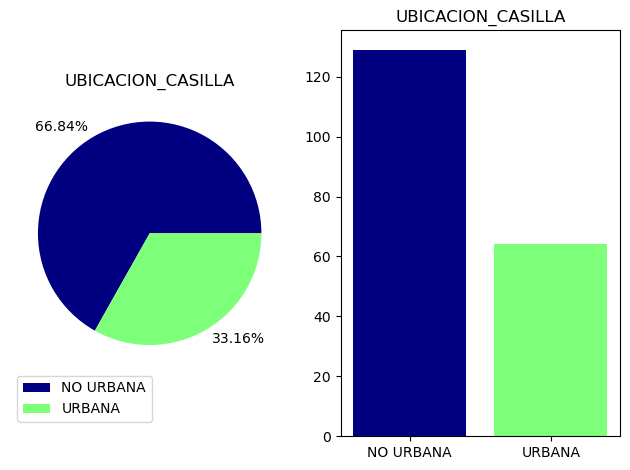

In [374]:
resume_column(data[data['DISTRITO_LOCAL']=='QUERETARO 13']['UBICACION_CASILLA'])

### -

Cantidad de registros por PAN_PRD_MC: 
[2648] 100%
0     90.67%
1      2.27%
2      2.00%
3      1.81%
4      1.44%
5      0.91%
6      0.60%
7      0.23%
8      0.04%
10     0.04%
Name: PAN_PRD_MC, dtype: object


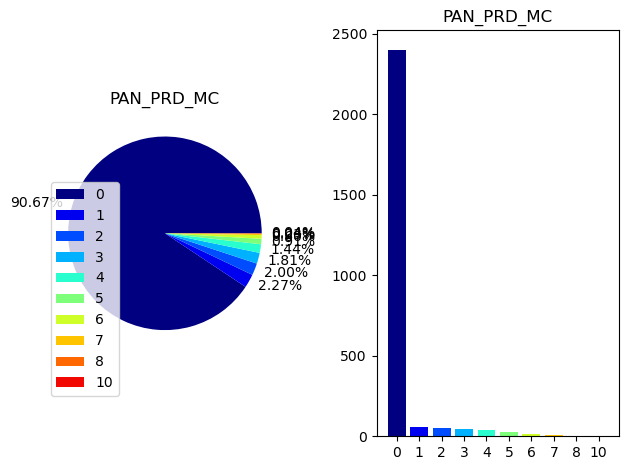

In [375]:
resume_column(data['PAN_PRD_MC'])


### -

Cantidad de registros por UBICACION_CASILLA: 
[2648] 100%
URBANA       55.59%
NO URBANA    44.41%
Name: UBICACION_CASILLA, dtype: object


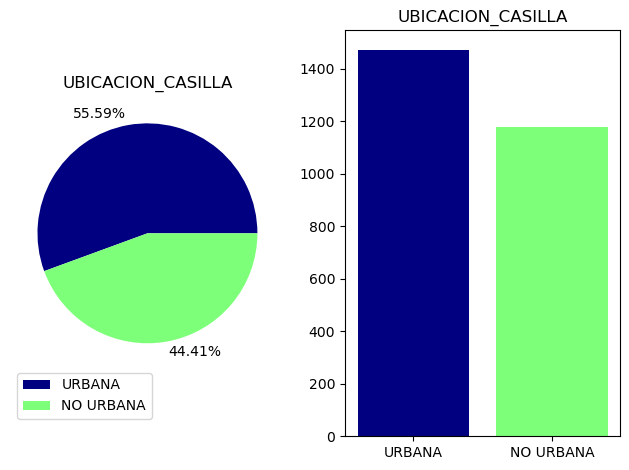

In [376]:
resume_column(data['UBICACION_CASILLA'])


### -

In [377]:
resume_column(data[data[]])


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3495289074.py, line 1)

                        PORCENTAJE_VOTO  PORCENTAJE_NO_VOTO
DISTRITO_LOCAL                                             
CADEREYTA DE MONTES 14         0.602978            0.397022
CORREGIDORA 07                 0.591694            0.408306
EL MARQUES 12                  0.627604            0.372396
JALPAN DE SERRA                0.628415            0.371585
PEDRO ESCOBEDO 10              0.613515            0.386485
QUERETARO 01                   0.597324            0.402676
QUERETARO 02                   0.571723            0.428277
QUERETARO 03                   0.561863            0.438137
QUERETARO 04                   0.593883            0.406117
QUERETARO 05                   0.592035            0.407965
QUERETARO 06                   0.620117            0.379883
QUERETARO 13                   0.509338            0.490662
SAN JUAN DEL RIO 08            0.611509            0.388491
SAN JUAN DEL RIO 09            0.586785            0.413215
TEQUISQUIAPAN 11               0.629327 

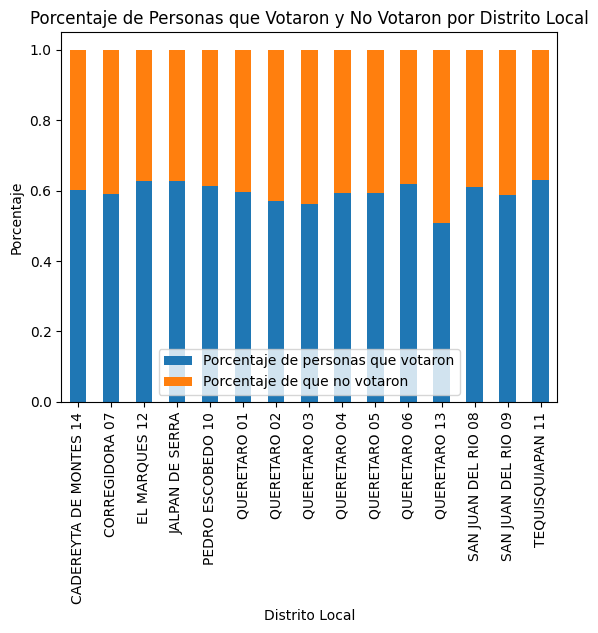

In [9]:
data_Votos = data
#Convirtiendo columnas a tipo numerico
data_Votos['TOTAL_PERSONAS_VOTARON'] = pd.to_numeric(data_Votos ['TOTAL_PERSONAS_VOTARON'], errors='coerce')
data_Votos['TOTAL_BOLETAS_SOBRANTES'] = pd.to_numeric(data_Votos ['TOTAL_BOLETAS_SOBRANTES'], errors='coerce')

# Agrupando los datos por "DISTRITO_LOCAL" y calculando porcentajes
df_agrupado = data_Votos.groupby('DISTRITO_LOCAL').sum()
df_agrupado['PORCENTAJE_VOTO'] = df_agrupado['TOTAL_PERSONAS_VOTARON'] / (df_agrupado['TOTAL_PERSONAS_VOTARON'] + df_agrupado['TOTAL_BOLETAS_SOBRANTES'])
df_agrupado['PORCENTAJE_NO_VOTO'] = 1 - df_agrupado['PORCENTAJE_VOTO']

print(df_agrupado[['PORCENTAJE_VOTO', 'PORCENTAJE_NO_VOTO']])

# Graficar los porcentajes de Personas que Votaron y No Votaron por distrito local
df_agrupado[['PORCENTAJE_VOTO', 'PORCENTAJE_NO_VOTO']].plot(kind='bar', stacked=True)

# Configuración adicional del gráfico
plt.xlabel('Distrito Local')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Personas que Votaron y No Votaron por Distrito Local')
plt.legend(['Porcentaje de personas que votaron', 'Porcentaje de que no votaron'])

# Mostrar el gráfico
plt.show()

## Notas

En la base de datos, ademas de datos faltantes, se contraron incosistencias como:

En que distritos hubo mas votos

El distrito mayormente votado para que partido fue

Sacar la Covertura y confianza (?) de los datos